In [94]:
import numpy as np
import pandas as pd
import datetime as dt
import os
from pathos.multiprocessing import Pool

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [113]:
execfile('./price_reader.py')
execfile('./optimizer.py')
execfile('./parser/score_func.py')
execfile('./parser/score_utils.py')

In [4]:
tickers = tickers = next(os.walk('../data/10-K/'))[1]
begin_date = dt.date(2007,1,1)
end_date = dt.date(2016,1,1)
horizon = 12
lag = 6

tickers_filtered = []
curr_dir = '../data/10-K/'
beta_dir = '../data/BETA/F-F_Research_Data_5_Factors_2x3_daily/'

beta_files = os.listdir(beta_dir)
tickers = np.intersect1d(tickers, beta_files)

for tic in tickers:
    this_dir = curr_dir + tic +   '/TEXT/'

    files = os.listdir(this_dir)
    dates = [ dt.datetime.strptime(f, '%Y-%m-%d').year for f in files]
    
    include = False

    if begin_date.year in dates and ( end_date + relativedelta(years=0) ).year in dates :
        include = True
    
    if include :
        tickers_filtered.append(tic)

tickers = tickers_filtered   

tickers_filtered = []
for tic in tickers:
    p =  pd.read_pickle('../data/BETA/F-F_Research_Data_5_Factors_2x3_daily/'+tic)
    m = p.max(axis=0)
    
    if m[5] < 0.8:
        tickers_filtered.append(tic)

tickers = tickers_filtered        
print len(tickers)


price_dir = '../data/PRICES/'
beta_dir = '../data/BETA/F-F_Research_Data_5_Factors_2x3_daily/'

price_files = os.listdir(curr_dir)
tickers = np.intersect1d(tickers, price_files)

tickers_filtered = []

for tic in tickers:
    this_file = price_dir + tic + '.pkl'
    p = pd.read_pickle(this_file)
    b1 = p.index[0]
    e1 = p.index[-1]
    
    if (b1.date() < begin_date) and e1.date() > (end_date) :
        tickers_filtered.append(tic)

tickers = tickers_filtered   


#bucket_list_dict = { bucket_list.iloc[0]:bucket_list.iloc[i,1] for tic in range(bucket_list.shape[0])}
#bucket_list = { bucket_list[tic]:for tic in tickers}

tickers_filtered = []
for tic in tickers:
    p =  pd.read_pickle('../data/BETA/F-F_Research_Data_5_Factors_2x3_daily/'+tic)
    m = p.max(axis=0)
    
    if m[5] < 0.8:
        tickers_filtered.append(tic)


len(tickers_filtered)



381


373

In [36]:
### Signal generation 
score_func_count = lambda x,y :similarity_score_word_count(x,y,use_ret=True)
score_func_vw = lambda x,y :similarity_score_word_vec(x,y,metric_type='dot')
score_func_pca = lambda x,y :similarity_score_pca_word_vec(x,y,metric_type='mse')


#signal_df_txt =  get_section_scores(tickers, 'TEXT_VW', begin_date, end_date, score_func_vw,lag  )
#signal_df_s_1a =  get_section_scores(tickers, 'S_1A_VW', begin_date, end_date, score_func_vw,lag  )
#signal_df_mda =  get_section_scores(tickers, 'MDA_VW', begin_date, end_date, score_func_vw,lag  )
#sig_vec = [signal_df_txt, signal_df_s_1a, signal_df_mda]
#sig_type = ['TEXT', 'S_1A', 'MDA']

In [ ]:
def my_func(f, tickers):
    #ncpus = cpu_count() if cpu_count() <= 8 else 8
    ncpus = 3
    
    p = Pool(processes = ncpus)
    result = p.map(f, tickers)


In [50]:
run_count_signals = False
if run_count_signals:
    signal_df_text_count =  get_section_scores(tickers, 'TEXT', begin_date, end_date, score_func_count,lag  )
    signal_df_1_sa_count =  get_section_scores(tickers, 'S_1A', begin_date, end_date, score_func_count,lag  )
    signal_df_md_count =  get_section_scores(tickers, 'MDA', begin_date, end_date, score_func_count,lag  )
    
    signal_df_text_count.to_pickle('../data/signals/text_count.pkl')
    signal_df_1_sa_count.to_pickle('../data/signals/1_sa_count.pkl')
    signal_df_md_count.to_pickle('../data/signals/mda_count.pkl')
    
    


In [53]:
run_vw_signals = False
if run_vw_signals:
    signal_df_text_vw =  get_section_scores(tickers, 'TEXT_VW', begin_date, end_date, score_func_vw,lag  )
    signal_df_1_sa_vw =  get_section_scores(tickers, 'S_1A_VW', begin_date, end_date, score_func_vw,lag  )
    signal_df_md_vw =  get_section_scores(tickers, 'MDA_VW', begin_date, end_date, score_func_vw,lag  )
    
    signal_df_text_vw.to_pickle('../data/signals/text_vw.pkl')
    signal_df_1_sa_vw.to_pickle('../data/signals/1_sa_vw.pkl')
    signal_df_md_vw.to_pickle('../data/signals/mda_vw.pkl')



In [98]:
run_sentiment_signals = False
sent_f = lambda name: get_section_scores(tickers, name, begin_date, end_date, sentimental_score, lag  )

names = ['TEXT', 'S_1A', 'MDA']
p = Pool(processes = 3)

if run_sentiment_signals:
    results = p.map( sent_f, names )     
    
    signal_df_sentiment_text = results[0]
    signal_df_sentiment_1_sa = results[1]
    signal_df_sentiment_mda = results[2]
    
    signal_df_sentiment_text.to_pickle('../data/signals/text_sentiment.pkl')
    signal_df_sentiment_1_sa.to_pickle('../data/signals/1_sa_sentiment.pkl')
    signal_df_sentiment_mda.to_pickle('../data/signals/mda_sentiment.pkl')


In [ ]:
run_lda_signals = True
lda_f = lambda name: get_section_scores(tickers, name, begin_date, end_date, lda_score, lag  )
np.random.seed(42)
names = ['TEXT', 'S_1A', 'MDA']
p = Pool(processes = 3)

if run_lda_signals:
    results = p.map( lda_f, names )     
    
    signal_df_lda_text = results[0]
    signal_df_lda_1_sa = results[1]
    signal_df_lda_mda = results[2]
    
    signal_df_lda_text.to_pickle('../data/signals/text_lda.pkl')
    signal_df_lda_1_sa.to_pickle('../data/signals/1_sa_lda.pkl')
    signal_df_lda_mda.to_pickle('../data/signals/mda_lda.pkl')


In [97]:
sentimental_score('../data/10-K/AAPL/TEXT/2005-12-01','../data/10-K/AAPL/TEXT/2014-10-27')

-0.08646912588978274

In [14]:
opt_dates = signal_df_text.index
factor_name = 'F-F_Research_Data_5_Factors_2x3_daily'

In [15]:
op_wiz = OptimizationWizard(tickers, factor_name, opt_dates )

In [16]:
op_wiz.beta_book[opt_dates[0]].isnull().any()



CMA       False
HML       False
Mkt-RF    False
RMW       False
SMB       False
vol       False
dtype: bool

In [17]:
def get_stats(signal_df, sec = 'TEXT_VW', adj_alpha = True , opt_type = 'quantile'):
    print sec
    alpha = 0
    
    alpha_tag = ''
    if adj_alpha:
        alpha_tag = 'adj_alpha'
        alpha = op_wiz.getAlpha(signal_df=signal_df,ic=0.5,adj_alpha=True, const_fac=1.0)
    else :   
        alpha_tag = 'unadj_alpha'
        alpha = op_wiz.getAlpha(signal_df=signal_df,ic=0.5,adj_alpha=False, const_fac=1.0)
    
    weights = 0
    if opt_type == 'quantile' :
        weights = op_wiz.getQuantileWeights(alpha, quantile= 0.25)
    
    if opt_type == 'mean_var':
        weights = op_wiz.getMeanVarWeights(alpha)
    
    if opt_type == 'zero_beta':
        weights = op_wiz.getZeroExposueWeights( alpha )
        
    
    p1,f1,a1= op_wiz.runStrategy(weights)
    
    print a1
    
    s1 = a1.mean()/a1.std()


    print 'Information Ratio'
    print s1
    print '------------'

    title = sec + ' ' + alpha_tag + ' ' + opt_type
    pnl = 1 + a1
    pnl = pnl.cumprod()
    
    pylab.plot(opt_dates, pnl)
    pylab.xlabel('time')
    pylab.ylabel('cum pnl')
    pylab.title(title)
    
    

    


s_1
2007-07-01    0.225968
2008-07-01   -0.000403
2009-07-01    0.110181
2010-07-01    0.012235
2011-07-01    0.040657
2012-07-01    0.003918
2013-07-01    0.078222
2014-07-01    0.087753
2015-07-01    0.028569
2016-07-01   -0.129524
dtype: float64
Information Ratio
0.499607961603
------------


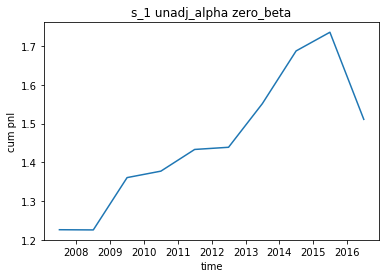

In [112]:
get_stats(signal_df=pd.read_pickle('../data/signals/text_count.pkl'), sec='s_1', opt_type='zero_beta', adj_alpha=False)
#alpha = op_wiz.getAlpha(signal_df=signal_df_mda,ic=0.5,adj_alpha=True, const_fac=1.0)
#weights = op_wiz.getQuantileWeights(alpha_df=alpha,quantile=0.25)

MDA
2007-07-01   -0.003218
2008-07-01   -0.004056
2009-07-01    0.090971
2010-07-01    0.105190
2011-07-01   -0.054204
2012-07-01    0.064317
2013-07-01    0.001614
2014-07-01    0.009348
2015-07-01    0.054661
2016-07-01   -0.022931
dtype: float64
Information Ratio
0.466057408362
------------


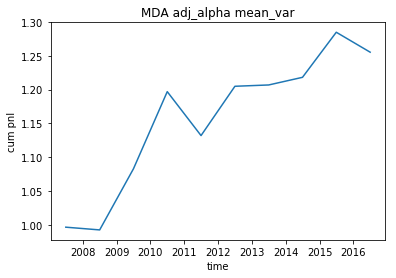

In [25]:
get_stats(signal_df=signal_df_text, sec='MDA', opt_type='mean_var', adj_alpha=True)

MDA
2007-07-01    0.014712
2008-07-01   -0.059270
2009-07-01   -0.061387
2010-07-01    0.056735
2011-07-01   -0.037843
2012-07-01    0.098811
2013-07-01   -0.058534
2014-07-01    0.011940
2015-07-01   -0.046460
2016-07-01    0.042352
dtype: float64
Information Ratio
-0.0682733732806
------------


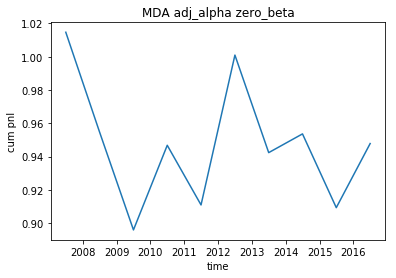

In [32]:
get_stats(signal_df=signal_df_sentiment, sec='MDA', opt_type='zero_beta', adj_alpha=True)

,A,AAP,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADS,...,WYN,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZION
count,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,10.000000,7.000000,10.000000,10.000000,...,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.890133,4.936804,4.946921,5.002576,4.961168,6.653314,5.005593,4.575803,5.235882,4.931585,...,4.984173,4.763004,4.917904,4.791222,4.893947,5.008142,4.945287,5.034446,4.871202,4.975150
std,0.038668,0.012154,0.028647,0.029748,0.014621,1.247077,0.024437,0.310922,0.060466,0.050580,...,0.010135,0.023713,0.011485,0.011739,0.017628,0.020802,0.025257,0.042820,0.037556,0.045778
min,4.850652,4.914777,4.900098,4.966825,4.934075,5.215367,4.974335,4.395158,5.152129,4.883926,...,4.972014,4.729139,4.899343,4.780206,4.872576,4.975366,4.878315,4.974390,4.832989,4.922893
25%,4.856874,4.929553,4.936131,4.976967,4.955294,6.260542,4.982284,4.395158,5.212991,4.896321,...,4.976172,4.745411,4.912848,4.783982,4.879143,4.987742,4.945052,4.992182,4.839693,4.939231
50%,4.880280,4.936380,4.946446,5.000527,4.958729,7.305717,5.005701,4.395158,5.222622,4.907243,...,4.981461,4.770012,4.917870,4.786557,4.894957,5.018328,4.947769,5.047841,4.858132,4.966687
75%,4.915463,4.944600,4.962250,5.019092,4.974217,7.372288,5.028468,4.677813,5.242409,4.959068,...,4.986980,4.781183,4.927315,4.796134,4.905652,5.024269,4.960287,5.066624,4.900311,5.011435
max,4.966730,4.954522,4.987467,5.054126,4.980135,7.438859,5.038026,5.094364,5.357949,5.022299,...,5.000733,4.792627,4.933617,4.818404,4.922786,5.030447,4.966588,5.087802,4.930605,5.044120


2005-07-01   -0.109411
2006-07-01   -0.076380
2007-07-01    0.008575
2008-07-01   -0.185171
2009-07-01   -0.066459
2010-07-01   -0.346728
2011-07-01   -0.046283
2012-07-01   -0.287424
2013-07-01   -0.302150
2014-07-01    0.033930
2015-07-01    0.014519
dtype: float64

,A,AAP,AAPL,ABC,ABT,ADI,ADP,ADS,ADSK,AEE,...,WYN,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZION
count,10.000000,10.00000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,8.000000,...,9.000000,10.000000,10.000000,10.000000,10.000000,10.0,6.000000,7.000000,10.00000,9.000000
mean,-6.100000,-5.00000,-3.50000,-2.300000,-5.800000,-4.30000,-3.000000,-4.400000,-2.800000,-13.875000,...,-7.111111,-8.100000,-6.600000,-9.800000,-2.300000,0.0,-8.666667,-17.142857,-7.20000,-11.111111
std,45.659245,10.77033,24.18103,10.801749,17.183972,20.93933,43.387146,11.663809,43.219851,35.674871,...,24.634551,19.416202,21.008993,23.878396,30.144283,0.0,20.500407,68.294530,20.73001,75.456021
min,-118.000000,-34.00000,-68.00000,-28.000000,-54.000000,-60.00000,-110.000000,-36.000000,-111.000000,-101.000000,...,-72.000000,-60.000000,-66.000000,-77.000000,-79.000000,0.0,-50.000000,-161.000000,-65.00000,-188.000000
25%,-0.750000,-4.75000,0.00000,-4.000000,-1.000000,-0.75000,-3.750000,-3.500000,0.000000,-8.000000,...,-1.000000,-1.750000,-0.750000,-5.000000,0.000000,0.0,-4.500000,-10.000000,-1.50000,-1.000000
50%,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,-0.500000,0.000000,-1.500000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.00000,0.00000,0.000000,1.000000,0.00000,3.750000,0.000000,0.000000,1.250000,...,0.000000,0.750000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
max,71.000000,1.00000,26.00000,16.000000,3.000000,21.00000,65.000000,6.000000,59.000000,8.000000,...,11.000000,1.000000,5.000000,0.000000,42.000000,0.0,4.000000,61.000000,6.00000,105.000000


array([-1.32399178,  2.1278851 , -0.48955087,  0.13002873,  1.21721116,
       -0.05590463])

(11, 28)

(28, 6)